# Introduction to Data Science, Assignment 6
####Instructors: Dr. Bahrak, Dr. Yaghoobzadeh
#### Mahdi Vajhi 810101558
#### Seyyed Ali Tahami 8101013397

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display

# Preprocessing and Q1

## Load dataset

Dataset
In 2014, some researchers published an article called "Impact of c1HbA Measurement on
Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." They
gathered data on diabetic patients from many hospitals and clinics in America. Some of this
data, about 200,000 items with 50 features, has been shared with the public in a way that
keeps people's identities private.
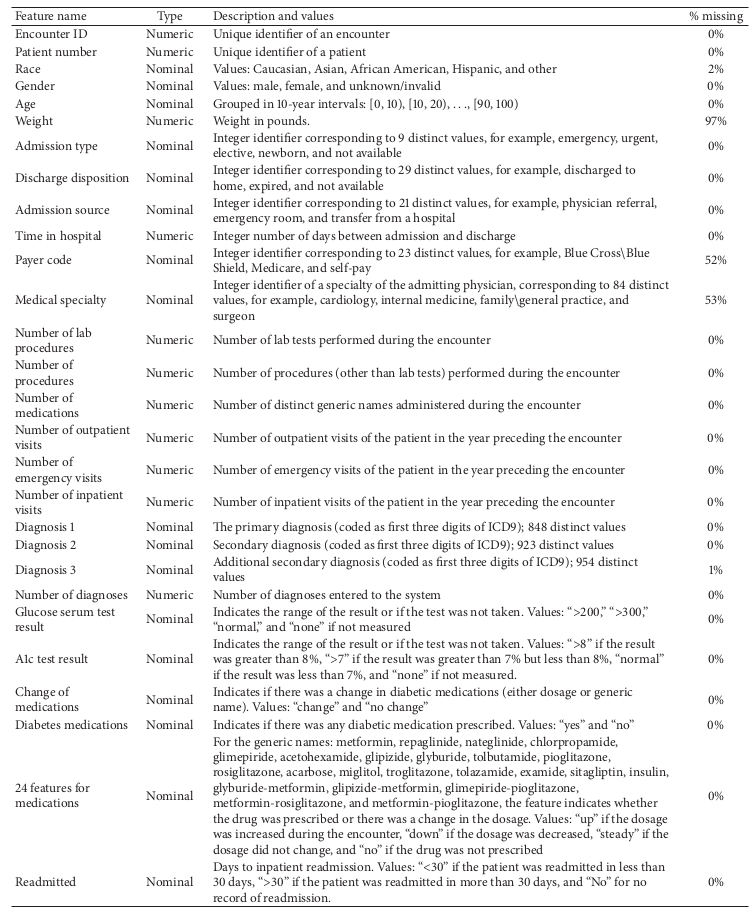

In [33]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset_diabetes/"
data_df = pd.read_csv(path + "diabetic_data.csv")
ID_df = pd.read_csv(path + "IDs_mapping.csv")

In [34]:
display(data_df)
display(ID_df)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


## check duplicated data

In [35]:
data_df.duplicated().value_counts()

False    101766
Name: count, dtype: int64

## Fix age

In [36]:
display(data_df['age'].iloc[0])
data_df['age'] = data_df['age'].str.strip('[)').str.split('-').apply(lambda x: [int(val) for val in x])
data_df['age'] = data_df['age'].apply(lambda x: np.mean(x) if x else None)
display(data_df['age'].iloc[0])

'[0-10)'

5.0

## convert diags
change icd9 code to groups
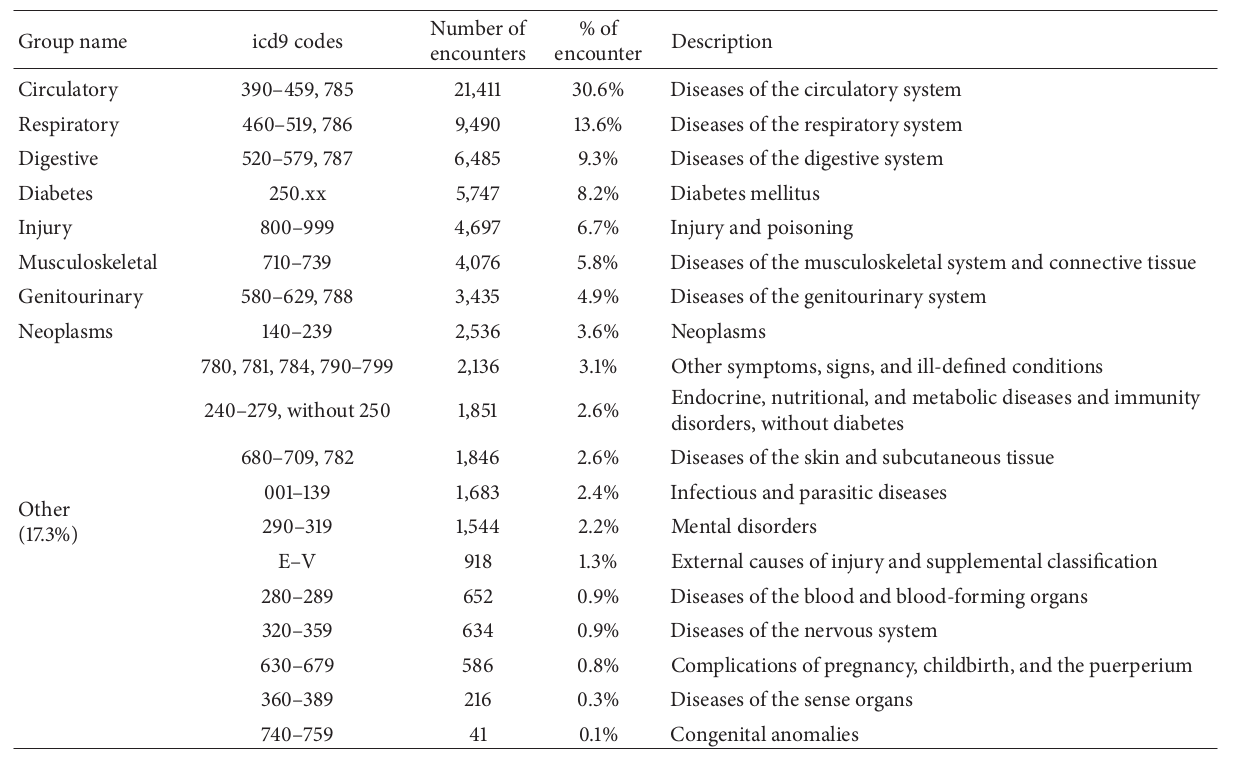

In [37]:
icd9_groups = {
    'Circulatory': [range(390,460), [785]],
    'Respiratory': [range(460,520), [786]],
    'Digestive': [range(520,580), [787]],
    'Diabetes': [np.linspace(250.0, 251.0, num=100, endpoint=False)],
    'Injury': [range(800,1000)],
    'Musculoskeletal': [range(710,740)],
    'Genitourinary': [range(580,630), [788]],
    'Neoplasms': [range(140,240)]
    # 'Other_symptoms': [range(460,519), [786]],
    # 'Disorders, without diabetes': [range(240,250), range(251,280)],
    # 'Skin': [range(680,710), [782]],
    # 'Parasitic': [range(1,140)],
    # 'Mental': [range(290,320)],
    # 'External causes of injury': [[f'V{i}'for i in range(100)], [f'E{i}'for i in range(100)]]
}

def categorize_icd9(code):
    try:
      code = float(code)
    except ValueError:
      pass
    for group_name, codes in icd9_groups.items():
      for i in codes:
        if code in i:
            return group_name
    return 'Other'

In [38]:
for i in ['diag_1', 'diag_2', 'diag_3']:
  data_df[i] = data_df[i].apply(categorize_icd9)
data_df[['diag_1', 'diag_2', 'diag_3']]

,diag_1,diag_2,diag_3
0,Diabetes,Other,Other
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes
...,...,...,...
101761,Diabetes,Other,Circulatory
101762,Digestive,Other,Digestive
101763,Other,Genitourinary,Other
101764,Injury,Other,Injury


## Convert discharge_disposition_id and admission_type_id

In [39]:
# admission_type_id
# id    count score description
# 1    53990  Emergency 1
# 3    18869  Elective  3
# 2    18480  Urgent    2
# 6     5291  nan       mean
# 5     4785  nan       mean
# 8      320  nan       mean
# 7       21  Trauma Center 7
# 4       10  Newborn 4
# Name: count, dtype: int64

data_df['admission_type_id'] = data_df['admission_type_id'].replace([5,6,8], data_df[data_df['admission_type_id'] <=3]['admission_type_id'].mean())

# discharge_disposition_id
# id    count score description
# 1     60234 3 Discharged to home
# 3     13954 1 Discharged/transferred to SNF
# 6     12902 2 Discharged/transferred to home with home health service
# 18     3691 - NULL
# 2      2128 0 Discharged/transferred to another short term hospital
# 22     1993 0 Discharged/transferred to another rehab fac including rehab units of a hospital .
# 11     1642 - Expired
# 5      1184 1 Discharged/transferred to another type of inpatient care institution
# 25      989 - Not Mapped
# 4       815 0 Discharged/transferred to ICF
# 7       623 - Left AMA
# 23      412 -1 Discharged/transferred to a long term care hospital.
# ...
# Name: count, dtype: int64

mapping = {1: 3, 3: 1, 6: 2, 2: 0, 22: 0, 5: 1, 4: 0}
tmp = data_df['discharge_disposition_id'].replace([1,3,6,2,22,5,4],[3,1,2,0,0,1,0])
tmp[tmp > 3] = tmp[tmp <= 3].mean()
data_df['discharge_disposition_id'] = tmp

# admission_source_id
# id    count score description
# 7     57494 Emergency Room
# 1     29565 Physician Referral
# 17     6781 NULL
# 4      3187 Transfer from a hospital
# 6      2264 Transfer from another health care facility
# 2      1104 Clinic Referral
# 5       855 Transfer from a Skilled Nursing Facility (SNF)
# 3       187 HMO Referral
# ...
# Name: count, dtype: int64

# drop :))
data_df.drop('admission_source_id', axis=1, inplace=True)

## Find missed data

In [40]:
for column in data_df.columns:
    print(data_df[column].isna().value_counts())
    print()

encounter_id
False    101766
Name: count, dtype: int64

patient_nbr
False    101766
Name: count, dtype: int64

race
False    101766
Name: count, dtype: int64

gender
False    101766
Name: count, dtype: int64

age
False    101766
Name: count, dtype: int64

weight
False    101766
Name: count, dtype: int64

admission_type_id
False    101766
Name: count, dtype: int64

discharge_disposition_id
False    101766
Name: count, dtype: int64

time_in_hospital
False    101766
Name: count, dtype: int64

payer_code
False    101766
Name: count, dtype: int64

medical_specialty
False    101766
Name: count, dtype: int64

num_lab_procedures
False    101766
Name: count, dtype: int64

num_procedures
False    101766
Name: count, dtype: int64

num_medications
False    101766
Name: count, dtype: int64

number_outpatient
False    101766
Name: count, dtype: int64

number_emergency
False    101766
Name: count, dtype: int64

number_inpatient
False    101766
Name: count, dtype: int64

diag_1
False    101766
Name: c

In [41]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101766, dtype: int64

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

age
75.0    26068
65.0    22483
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125

In [42]:
for column in data_df.columns:
    print(column, data_df[data_df[column]=='?'][column].count())
    print()

encounter_id 0

patient_nbr 0

race 2273

gender 0

age 0

weight 98569

admission_type_id 0

discharge_disposition_id 0

time_in_hospital 0

payer_code 40256

medical_specialty 49949

num_lab_procedures 0

num_procedures 0

num_medications 0

number_outpatient 0

number_emergency 0

number_inpatient 0

diag_1 0

diag_2 0

diag_3 0

number_diagnoses 0

max_glu_serum 0

A1Cresult 0

metformin 0

repaglinide 0

nateglinide 0

chlorpropamide 0

glimepiride 0

acetohexamide 0

glipizide 0

glyburide 0

tolbutamide 0

pioglitazone 0

rosiglitazone 0

acarbose 0

miglitol 0

troglitazone 0

tolazamide 0

examide 0

citoglipton 0

insulin 0

glyburide-metformin 0

glipizide-metformin 0

glimepiride-pioglitazone 0

metformin-rosiglitazone 0

metformin-pioglitazone 0

change 0

diabetesMed 0

readmitted 0



## Fix missed data

In [43]:
# rm miss val
for i in ['diag_1', 'diag_2', 'diag_3']:
  data_df = data_df[data_df[i] != '?']
data_df = data_df[data_df['gender'] != 'Unknown/Invalid']

# high miss val
data_df.drop('weight', axis=1, inplace=True)
data_df.drop('payer_code', axis=1, inplace=True)
data_df.drop('medical_specialty', axis=1, inplace=True)

# same val
data_df.drop('acetohexamide', axis=1, inplace=True)
data_df.drop('tolbutamide', axis=1, inplace=True)
data_df.drop('miglitol', axis=1, inplace=True)
data_df.drop('troglitazone', axis=1, inplace=True)
data_df.drop('tolazamide', axis=1, inplace=True)
data_df.drop('examide', axis=1, inplace=True)
data_df.drop('citoglipton', axis=1, inplace=True)
data_df.drop('glipizide-metformin', axis=1, inplace=True)
data_df.drop('glimepiride-pioglitazone', axis=1, inplace=True)
data_df.drop('metformin-rosiglitazone', axis=1, inplace=True)
data_df.drop('metformin-pioglitazone', axis=1, inplace=True)

# high nan
data_df.drop('max_glu_serum', axis=1, inplace=True)
data_df.drop('A1Cresult', axis=1, inplace=True)

# unimportant
data_df.drop('patient_nbr', axis=1, inplace=True)
data_df.drop('race', axis=1, inplace=True)

In [44]:
data_df

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,2278392,Female,5.0,1.615487,2.377899,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Female,15.0,1.000000,3.000000,3,59,0,18,0,...,No,No,No,No,No,Up,No,Ch,Yes,>30
2,64410,Female,25.0,1.000000,3.000000,2,11,5,13,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,Male,35.0,1.000000,3.000000,2,44,1,16,0,...,No,No,No,No,No,Up,No,Ch,Yes,NO
4,16680,Male,45.0,1.000000,3.000000,1,51,0,8,0,...,Steady,No,No,No,No,Steady,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,Male,75.0,1.000000,1.000000,3,51,0,16,0,...,No,No,No,No,No,Down,No,Ch,Yes,>30
101762,443847782,Female,85.0,1.000000,0.000000,5,33,3,18,0,...,No,No,No,No,No,Steady,No,No,Yes,NO
101763,443854148,Male,75.0,1.000000,3.000000,1,53,0,9,1,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101764,443857166,Female,85.0,2.000000,1.000000,10,45,2,21,0,...,Steady,No,Steady,No,No,Up,No,Ch,Yes,NO


In [45]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

encounter_id
2278392      1
190791024    1
190789722    1
190786806    1
190785018    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101763, dtype: int64

gender
Female    54708
Male      47055
Name: count, dtype: int64

age
75.0    26066
65.0    22482
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

admission_type_id
1.000000    53988
3.000000    18868
2.000000    18480
1.615487    10396
7.000000       21
4.000000       10
Name: count, dtype: int64

discharge_disposition_id
3.000000    60232
1.000000    15138
2.000000    12902
2.377899     8556
0.000000     4935
Name: count, dtype: int64

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

num_lab_procedures
1      3208
43  

## Convert categurical columns to orderd num

In [46]:
data_df['readmitted'] = data_df['readmitted'].map({'NO': 0, '>30': 2, '<30': 1})

for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
          'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
          'glyburide-metformin']:
  data_df[i] = data_df[i].map({'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3})

for i in ['gender', 'change', 'diabetesMed']:
  a = data_df[i].unique()
  data_df[i] = data_df[i].map({a[j]:j for j in range(len(a))})

# one_hot = pd.get_dummies(data_df['race'])
# data_df.drop('race', axis = 1, inplace=True)
# data_df = data_df.join(one_hot)

one_hot = pd.get_dummies(data_df['diag_1']) * 3
one_hot += pd.get_dummies(data_df['diag_2']) * 2
one_hot += pd.get_dummies(data_df['diag_3']) * 1
data_df.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace=True)
data_df = data_df.join(one_hot)

In [47]:
data_df

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,readmitted,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other,Respiratory
0,2278392,0,5.0,1.615487,2.377899,1,41,0,1,0,...,0,0,3,0,0,0,0,0,3,0
1,149190,0,15.0,1.000000,3.000000,3,59,0,18,0,...,2,0,2,0,0,0,0,0,4,0
2,64410,0,25.0,1.000000,3.000000,2,11,5,13,2,...,0,0,2,0,0,0,0,0,4,0
3,500364,1,35.0,1.000000,3.000000,2,44,1,16,0,...,0,1,2,0,0,0,0,0,3,0
4,16680,1,45.0,1.000000,3.000000,1,51,0,8,0,...,0,0,1,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,1,75.0,1.000000,1.000000,3,51,0,16,0,...,2,1,3,0,0,0,0,0,2,0
101762,443847782,0,85.0,1.000000,0.000000,5,33,3,18,0,...,0,0,0,4,0,0,0,0,2,0
101763,443854148,1,75.0,1.000000,3.000000,1,53,0,9,1,...,0,0,0,0,2,0,0,0,4,0
101764,443857166,0,85.0,2.000000,1.000000,10,45,2,21,0,...,0,0,0,0,0,4,0,0,2,0


In [48]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

encounter_id
2278392      1
190791024    1
190789722    1
190786806    1
190785018    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101763, dtype: int64

gender
0    54708
1    47055
Name: count, dtype: int64

age
75.0    26066
65.0    22482
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

admission_type_id
1.000000    53988
3.000000    18868
2.000000    18480
1.615487    10396
7.000000       21
4.000000       10
Name: count, dtype: int64

discharge_disposition_id
3.000000    60232
1.000000    15138
2.000000    12902
2.377899     8556
0.000000     4935
Name: count, dtype: int64

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

num_lab_procedures
1      3208
43     2804
44

In [49]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101763 non-null  int64  
 1   gender                    101763 non-null  int64  
 2   age                       101763 non-null  float64
 3   admission_type_id         101763 non-null  float64
 4   discharge_disposition_id  101763 non-null  float64
 5   time_in_hospital          101763 non-null  int64  
 6   num_lab_procedures        101763 non-null  int64  
 7   num_procedures            101763 non-null  int64  
 8   num_medications           101763 non-null  int64  
 9   number_outpatient         101763 non-null  int64  
 10  number_emergency          101763 non-null  int64  
 11  number_inpatient          101763 non-null  int64  
 12  number_diagnoses          101763 non-null  int64  
 13  metformin                 101763 non-null  int64 

## Fix type

In [50]:
data_df['age']= data_df['age'].astype(int)
data_df['gender']= data_df['gender'].astype(bool)

## Check correlation

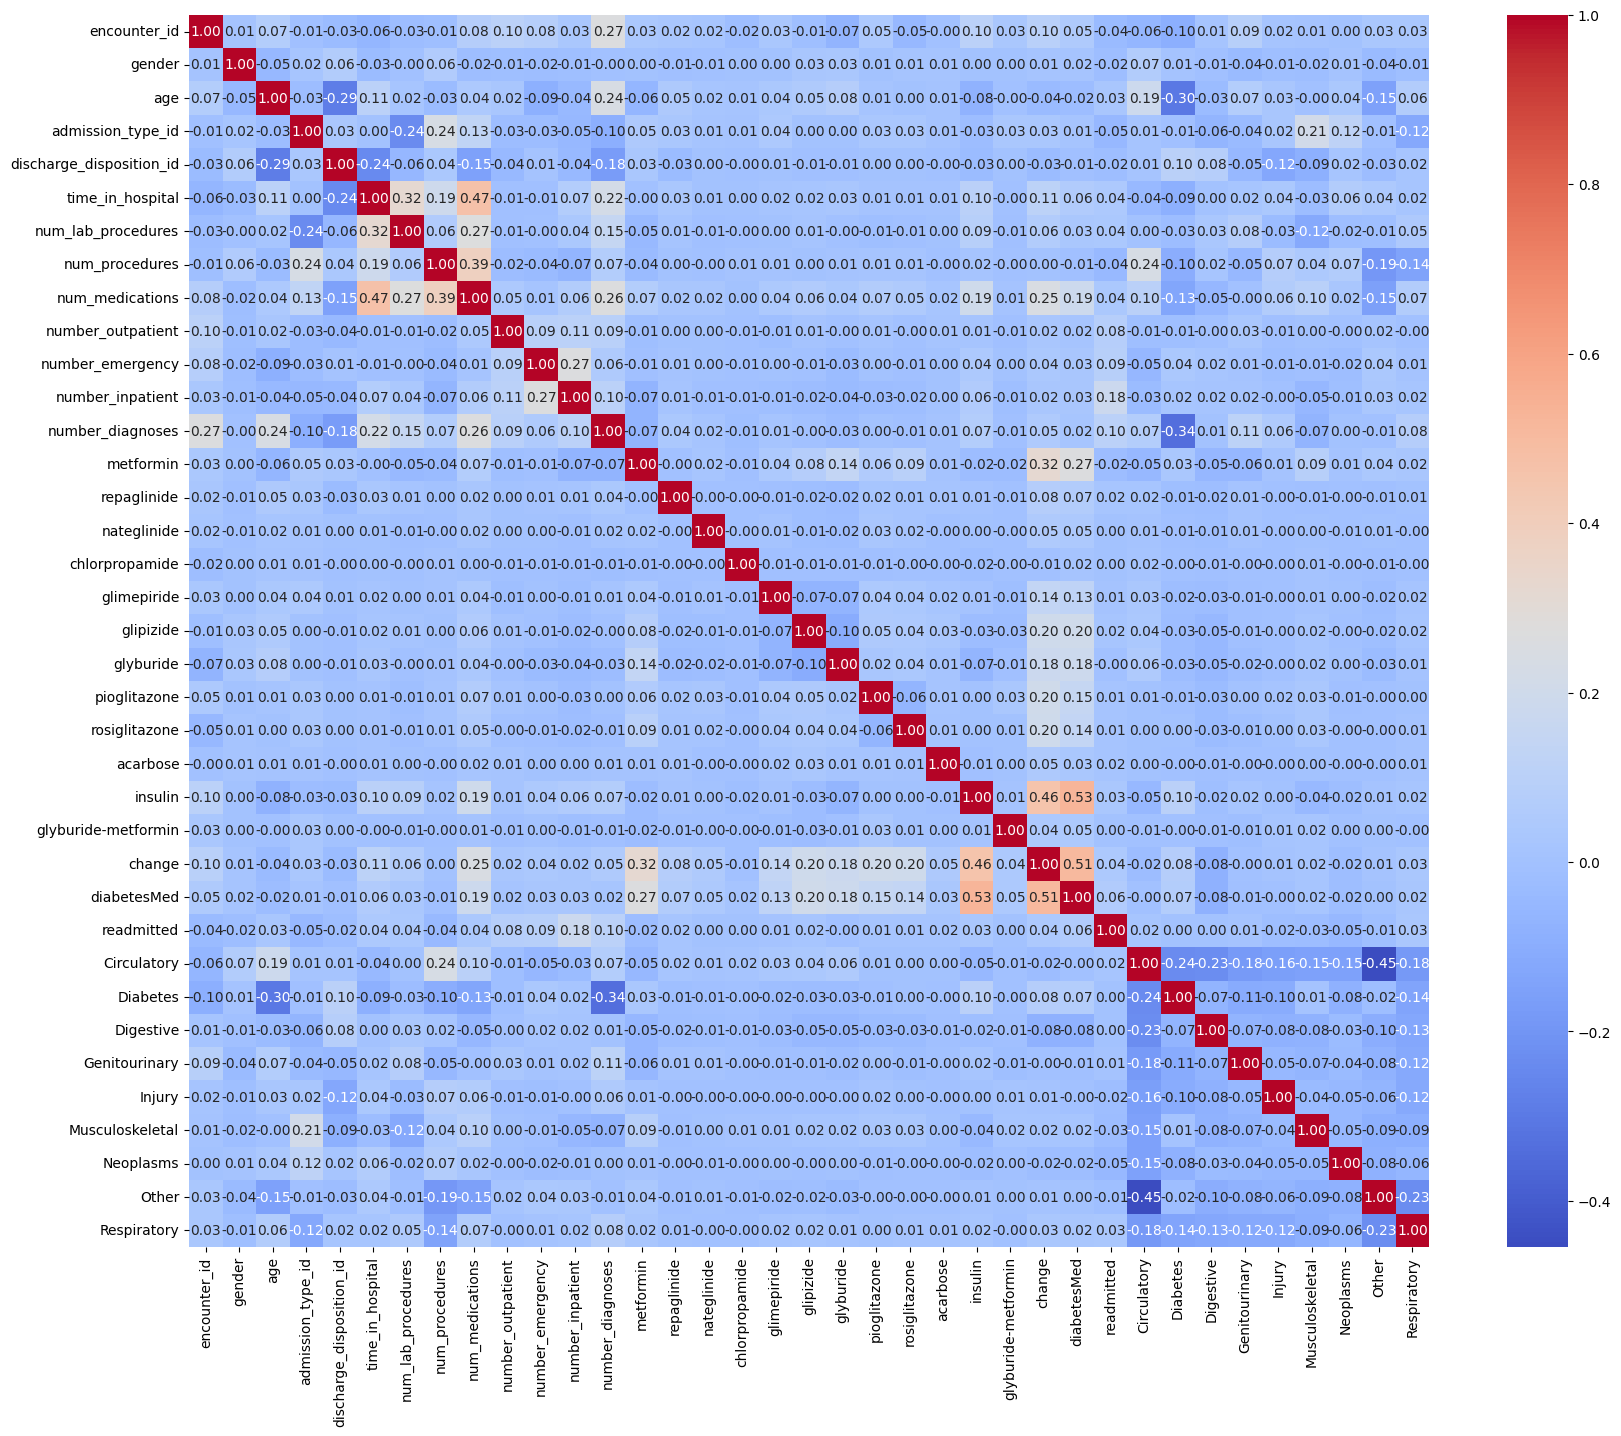

In [51]:
corr = data_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## drop encounter_id for train module

In [52]:
encounter_id = data_df['encounter_id']
data_df.drop('encounter_id', axis=1, inplace=True)

# PCA and Q2

In PCA, to reduce the dimensions, we look for a hyperplane that can reduce our dimensions by removing the smallest information, for example, look at the image below, we have a line x = y in 2 dimensions, if we want to reduce the dimensions of our hyperplane We draw the line x = y, and with this, all the data is placed on this dimension, and in this way, we have reduced the dimensions of our data. In Sakitleran, we have the ability to specify the minimum amount of information retention and according to that, the most possible dimension reduction can be done.
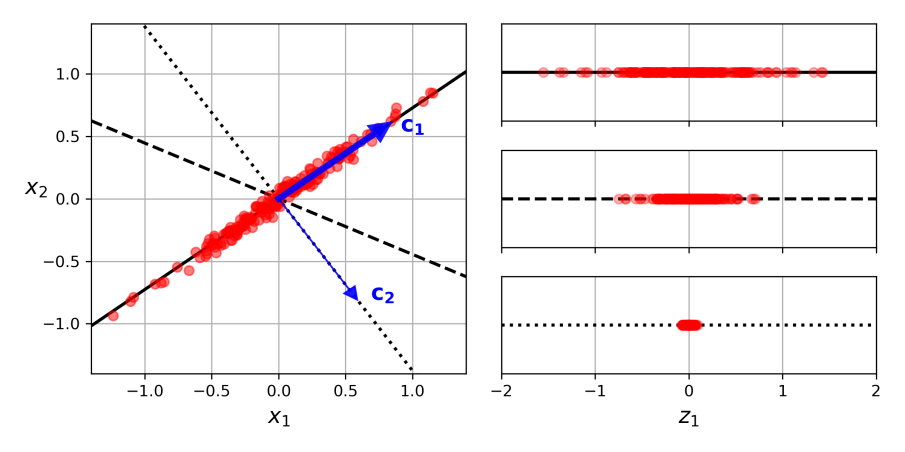

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_transformed = pca.fit_transform(data_df)
pd.DataFrame(df_transformed, columns=[f'PC{i+1}' for i in range(df_transformed.shape[1])])

,PC1,PC2,PC3
0,-7.683022,61.258327,-13.608900
1,13.159979,51.804293,0.906604
2,-34.475068,39.212362,2.427570
3,-0.922303,31.068759,0.294320
4,5.384775,21.662387,-9.008853
...,...,...,...
101758,8.237934,-8.506455,-1.697787
101759,-8.594600,-19.626023,2.990944
101760,9.250892,-8.325564,-8.935913
101761,3.900153,-19.062653,5.074656


In [54]:
df_transformed.reshape(3, -1)[0].shape

(101763,)

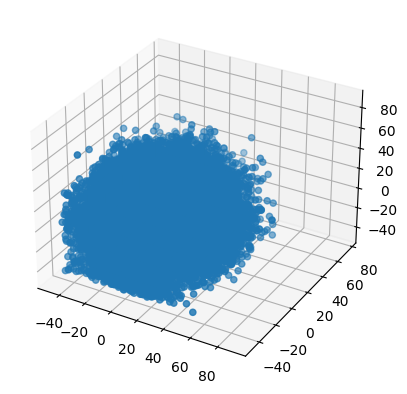

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
tmp = df_transformed.reshape(3, -1)
ax.scatter(tmp[0], tmp[1], tmp[2])

# Unsupervised Learning

## K mean

### testing

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k=5
kmeans = KMeans(n_clusters=k, random_state=42).fit(df_transformed)
score = silhouette_score(df_transformed, kmeans.labels_, sample_size=5000)
score

0.29023147366961305

### find hyparaprameters

In [57]:
out = list()

2 0.30437879858902633
3 0.31757203804612566
4 0.3037272339466387
5 0.29111322284430474
6 0.27973000607608745
7 0.2814597623177868
8 0.2750967569908824
9 0.26528291565619805


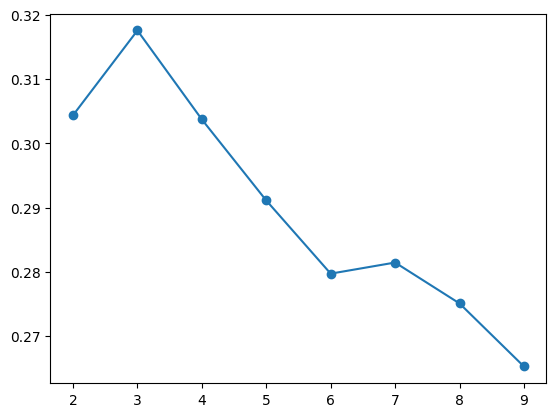

In [58]:
import warnings
warnings.filterwarnings("ignore")
for k in range(2,10,1):
  kmeans = KMeans(n_clusters=k, random_state=42).fit(df_transformed)
  score = silhouette_score(df_transformed, kmeans.labels_, sample_size=5000)
  out.append((k, score))
  print(k, score)
# for k in range(10,50,2):
#   kmeans = KMeans(n_clusters=k, random_state=42).fit(df_transformed)
#   score = silhouette_score(df_transformed, kmeans.labels_, sample_size=5000)
#   out.append((k, score))
#   print(k, score)
# for k in range(50,100,4):
#   kmeans = KMeans(n_clusters=k, random_state=42).fit(df_transformed)
#   score = silhouette_score(df_transformed, kmeans.labels_, sample_size=5000)
#   out.append((k, score))
#   print(k, score)
plt.plot([i[0] for i in out], [i[1] for i in out], 'o-')

## DBSCAN

### testing

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=4).fit(df_transformed)
score = silhouette_score(df_transformed, dbscan.labels_, sample_size=5000)
print(len(np.unique(dbscan.labels_)), len([i for i in dbscan.labels_ if i == -1]), score)

### find hyparaprameters

#### Find lbow

In [ ]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5).fit(df_transformed)
neigh_dist, neigh_ind = nbrs.kneighbors(df_transformed)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("kNN distance")
plt.xlabel("Sorted observations (n=5)")
plt.show()
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

print(kneedle.knee_y)

#### Find hyperparameters

In [ ]:
out_db = list()
for i in range(2,50,2):
  nbrs = NearestNeighbors(n_neighbors = i+1).fit(df_transformed)
  neigh_dist, neigh_ind = nbrs.kneighbors(df_transformed)
  sort_neigh_dist = np.sort(neigh_dist, axis = 0)
  k_dist = sort_neigh_dist[:, i]
  kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)
  dbscan = DBSCAN(eps=kneedle.knee_y, min_samples=i).fit(df_transformed)
  score = silhouette_score(df_transformed, dbscan.labels_, sample_size=5000)
  out_db.append((i, score))
  print(i, len(np.unique(dbscan.labels_)), len([i for i in dbscan.labels_ if i == -1]), score)
plt.plot([i[0] for i in out_db], [i[1] for i in out_db], 'o-')
# 2 14 18 0.07639193596211502
# 4 13 23 0.08564086629424349
# 6 11 40 0.09037760369763692
# 8 11 47 0.08597879975957924
# 10 11 62 0.08508442908060398
# 12 11 77 0.08317838631044785
# 14 11 88 0.08413060989024253
# 16 12 99 0.08109611316801814
# 18 12 103 0.08181969761145055
# 20 11 138 0.08804811498071236
# 22 11 150 0.08506144849154637
# 24 11 164 0.08450302409327304
# 26 11 178 0.08666545677255723
# 28 11 187 0.08854661683932954
# 30 11 210 0.08939124079969286
# 32 11 226 0.086045097131164
# 34 11 237 0.08199745349538481
# 36 11 252 0.089784506034811
# 38 11 258 0.08594843098580907
# 40 11 274 0.08720306130263367
# 42 11 285 0.08625470858725534
# 44 11 297 0.08818897680384173
# 46 11 309 0.08874872184665122
# 48 11 335 0.08780359984791362

In [59]:
dbscan = DBSCAN(eps=8.71, min_samples=6).fit(df_transformed)
score = silhouette_score(df_transformed, dbscan.labels_, sample_size=5000)
print(len(np.unique(dbscan.labels_)), len([i for i in dbscan.labels_ if i == -1]), score)

11 40 0.08668853223847257


# Save result

In [60]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_transformed)
dbscan = DBSCAN(eps=8.71, min_samples=6).fit(df_transformed)

In [61]:
print(len(encounter_id))
print(len(dbscan.labels_))
print(len(kmeans.labels_))

101763
101763
101763


In [62]:
result_df = pd.DataFrame({'encounter_id':encounter_id, 'dbscan':dbscan.labels_, 'kmeans':kmeans.labels_})
result_df

,encounter_id,dbscan,kmeans
0,2278392,0,2
1,149190,1,2
2,64410,2,0
3,500364,3,2
4,16680,4,2
...,...,...,...
101761,443847548,7,1
101762,443847782,8,0
101763,443854148,7,1
101764,443857166,8,1


In [63]:
result_df.to_csv('result.csv', index=False)

# Questions

## Q4: kmean hyperparameter


### lbow method
To find the best k, we first draw the graph of the error function in terms of different values of k. As in the diagram below, we are looking for the elbow point, which is actually a point where the slope of the diagram decreases significantly.
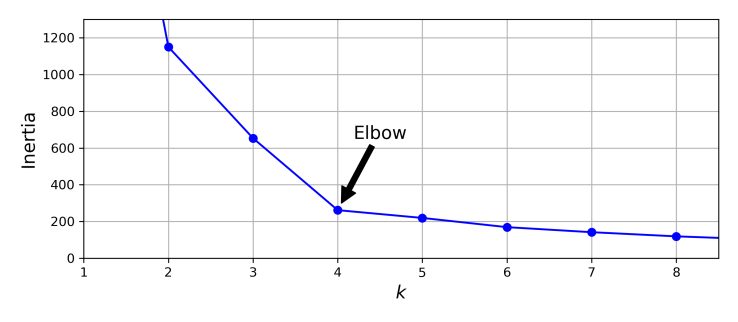

### Silhouette Score
Silhouette criteria
This criterion shows the level of intra-cluster connectivity and the separability of clusters. To calculate it, we first calculate the distance of each point from the rest of the points in our cluster.

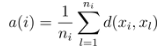

Now we calculate the distance of each cluster point with the closest cluster to it (in terms of average distance).

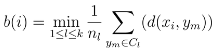

Finally, we calculate the following value.

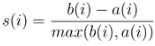

This number is a value between -1 and 1, and any value close to 1 means the model is better and the clusters are more relevant. In fact, any low value of this criterion indicates that the points within the cluster have little connection with the cluster and cannot be separated from the rest of the clusters.
By drawing a silhouette diagram for different values of k and selecting the maximum, we can find the appropriate value of k

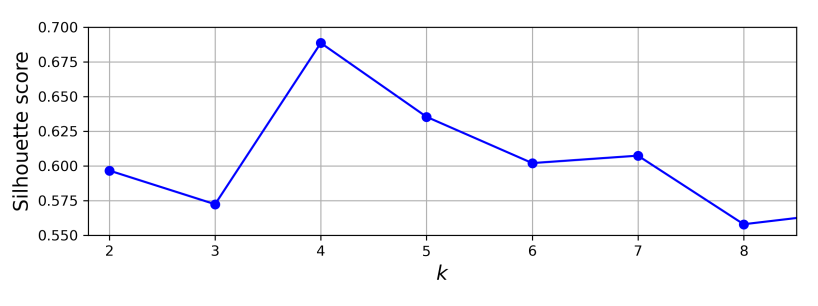

### Silhouette Diagram
By drawing a Silhouette Diagram, we have a diagram like the one below. We draw this diagram for different k. It is suitable to cut all or most of the clusters in the dashed line diagram. We can also observe the dimensions and volume of the clusters and make a decision about it.
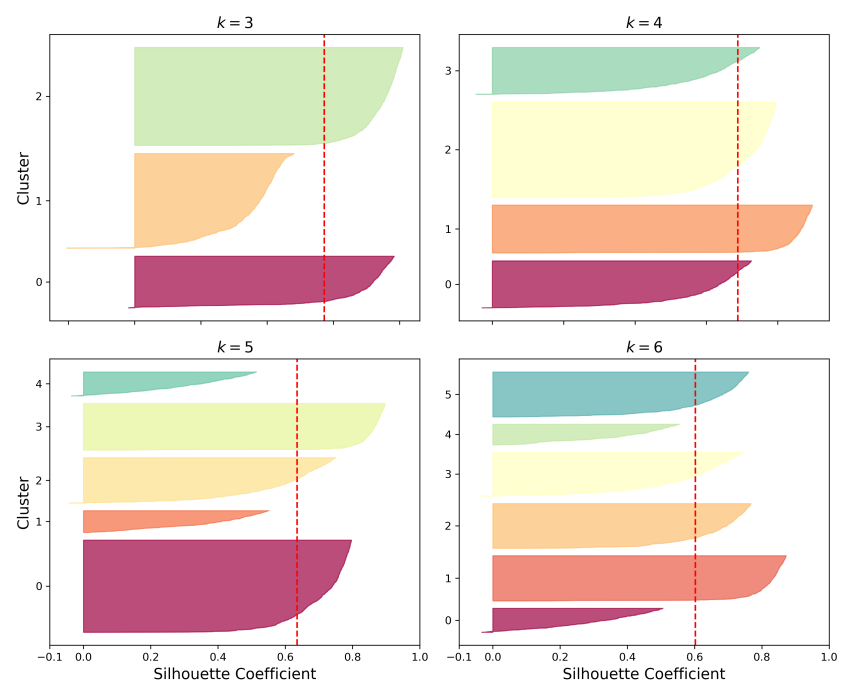

## Q5: DBSCAN hyperparameter
For each parameter value, we calculate the optimal value of epsilon and finally choose the best one by comparing the Silhouette scores. To find the best epsilon, we use graphing and finding the elbow or use Silhouette Score. Like what is implemented in the project.

## Q6: K mean vs DBSCAN
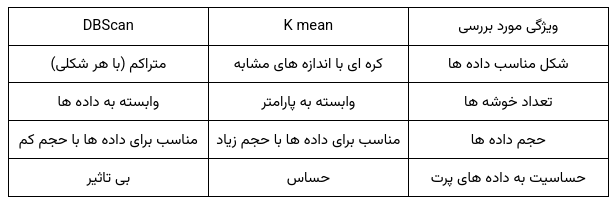